In [6]:
# Coding part of Text Analytics
# 1. Word Cloud
# 2. Sentiment Analysis

import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [8]:
input_data = pd.read_csv('input/sentiment_data.tsv', delimiter='\t') #data input
sentence = input_data['sentence'] #
label = input_data['label']
stopwords = set(STOPWORDS)

print(sentence)

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: sentence, Length: 1000, dtype: object


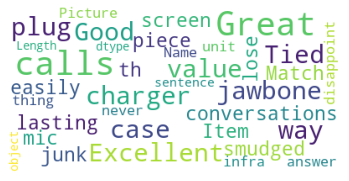

In [9]:
# 1. Wordcloud

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(input_data['sentence']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

In [12]:
# 2. Sentiment Analysis

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

input_data = pd.read_csv('input/sentiment_data.tsv', delimiter='\t')
sentence = input_data['sentence']
label = input_data['label']
cv = CountVectorizer()
model = MLPClassifier()

In [13]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', model),
])
pipeline.fit(sentence, label)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MLPClassifier())])

In [14]:
pipeline.predict(['you are worst'])

array([0])

In [15]:
pipeline.predict(['Hei pretty woman'])

array([1])